# Hotel Booking Exploratory Data Analysis

##### By Tony Ige

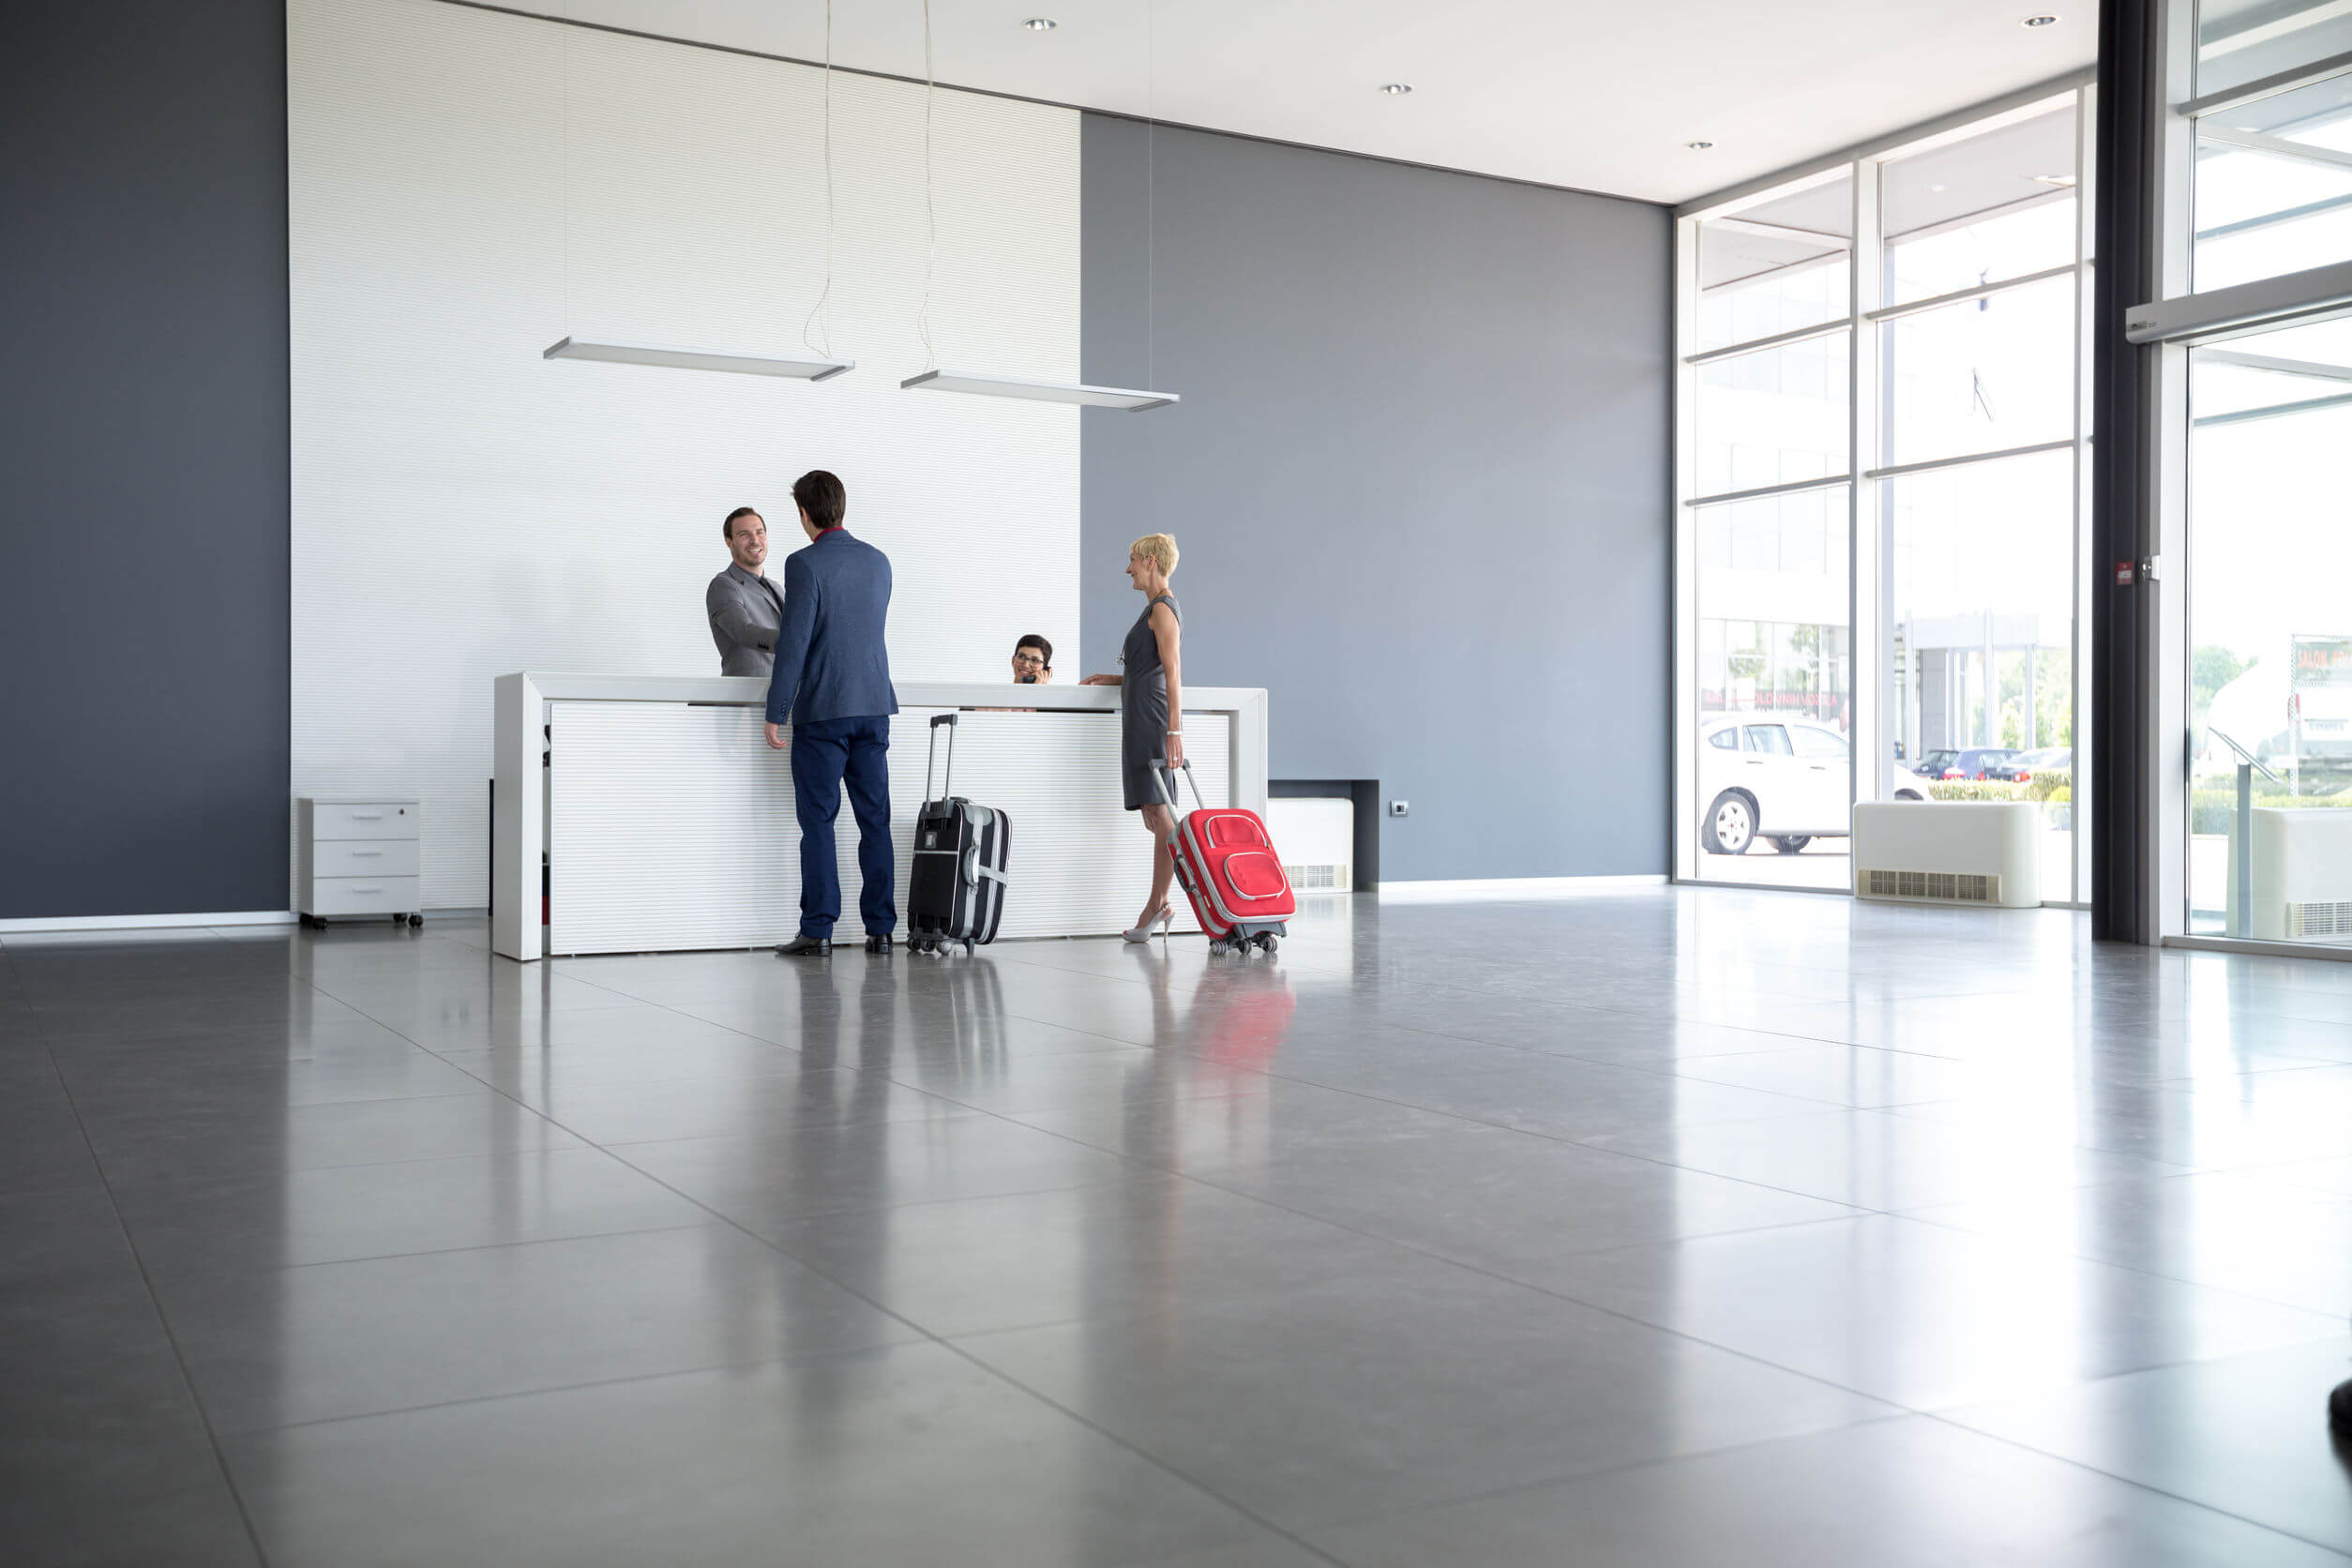

In [1]:
from IPython.display import Image
Image(filename='pictures.jpg')

## Objectives:
The main objective of this project is to explore data mining on hotel booking demands. 
***

<a id="tableofcontents"></a>
Table of Contents:
***
1. [Introduction](#intro)
2. [Methodology](#method)
3. [Dataset](#dataset)
4. [Data Processing](#data)
5. [Questions to Explore](#quest)
6. [Exploratory Data Analysis](#explore)
7. [Conclusion](#con)

<a id="intro"></a>
## Introduction:
***
This data analysis involves exploration of a large dataset relating to hotel booking demand to determine how often people cancel their bookings, how long people stay in hotels, and which months are the busiest in the year.

<a id="method"></a>
## Methodology:
***
In this project, I used Python to examine the “hotel_bookings” dataset. I imported the data by first downloading the data and saving it as a .csv file, then I used the read.csv function in Python to begin the analysis.

<a id="dataset"></a>
## Dataset:
***
This dataset contains booking information for a city hotel and a resort hotel, and it includes information such as when the bookings were made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. For the purpose of this project, I only focused on some of these variables to analyze.

<a id="data"></a>
## Data Preprocessing:
***
First copy the dataset, so our original dataset remains unchanged

![](img1.png)

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 2000)

In [3]:
from IPython.display import Image

!pip install pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

In [4]:
## Importing Data
data = pd.read_csv('hotel_bookings.csv')

## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.shape

(119390, 32)

In [6]:
len(data.columns)

32

Group by Hotel


In [7]:
groups  = data.groupby('hotel')

In [8]:
H1 = groups.get_group('Resort Hotel')


In [9]:
H2 = groups.get_group ('City Hotel')

In [10]:
H1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
H2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [12]:
H1.shape

(40060, 32)

In [13]:
H2.shape

(79330, 32)

In [14]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
data.iloc[0:8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03


In [17]:
data.iloc[0: ,8:16]

,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,0,2,0.0,0,BB,PRT,Direct,Direct
1,0,2,0.0,0,BB,PRT,Direct,Direct
2,1,1,0.0,0,BB,GBR,Direct,Direct
3,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,2,2,0.0,0,BB,GBR,Online TA,TA/TO
...,...,...,...,...,...,...,...,...
119385,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO
119386,5,3,0.0,0,BB,FRA,Online TA,TA/TO
119387,5,2,0.0,0,BB,DEU,Online TA,TA/TO
119388,5,2,0.0,0,BB,GBR,Online TA,TA/TO


In [18]:
data.iloc[0: ,16:24]

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent
0,0,0,0,C,C,3,No Deposit,NaN
1,0,0,0,C,C,4,No Deposit,NaN
2,0,0,0,A,C,0,No Deposit,NaN
3,0,0,0,A,A,0,No Deposit,304.0
4,0,0,0,A,A,0,No Deposit,240.0
...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,No Deposit,394.0
119386,0,0,0,E,E,0,No Deposit,9.0
119387,0,0,0,D,D,0,No Deposit,9.0
119388,0,0,0,A,A,0,No Deposit,89.0


In [19]:
data.iloc[0: ,24:32]

,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...
119385,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [21]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [22]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [23]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [24]:
dc

NameError: name 'dc' is not defined

#### Dealing with Missing Values
Check if our data contains any missing values
Find the missing value, show the total null values for each column and sort it in descending order


In [25]:
dc = data.copy()

### We have 4 features with missing values.
In the agent and the company column, we have id_number for each agent or company, 
so for all the missing values, we will just replace it with 0.

In [26]:
## If no id of agent or company is null, just replace it with 0
dc[['agent','company']] = dc[['agent','company']].fillna(0.0)

In [27]:
dc.adults

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 119390, dtype: int64

#### Number of booking where adults and children were zero

In [28]:

dc[(dc.adults+dc.children)==0].shape

(180, 32)

#### For the missing values in the country column, replace it with mode (value that appears most often)

In [29]:

dc['country'].fillna(data.country.mode().to_string(), inplace=True)

#for missing children value, replace it with rounded mean value
dc['children'].fillna(round(data.children.mean()), inplace=True)

1.There are many rows that have zero guests including adults, children and babies.
We have 180 such rows. We will just remove these rows.
Drop Rows where there is no adult, baby and child

In [30]:
dc = dc.drop(dc[(dc.adults+dc.babies+dc.children)==0].index)

In [31]:
type(dc)

pandas.core.frame.DataFrame

2.Converting Datatype
Let’s check the datatype of each column in our dataset.

In [32]:
dc.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.
There are some columns like children, company, and agent, that are float type but their values are only in integers.
So we will convert them to the integer type.


convert datatype of these columns from float to integer

In [33]:
dc[['children', 'company', 'agent']] = dc[['children', 'company', 'agent']].astype('int64')

<a id="quest"></a>
## Questions to Explore:
***

1. What percentage of the booking were cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. What is the percentage of booking for each year?
4. Which is the busiest month for hotels?
5. From which country most guests come?
6. How Long People Stay in the hotel?
7. Which was the most booked accommodation type (Single, Couple, Family)?

[Back To Table of Contents](#tableofcontents)

<a id="explore"></a>
## Exploratory Data Analysis
***


Now let’s do the fun part, extract the information from our data and try to answer our questions.
Let’s write the function to get the percentage of different values.

In [34]:
from methods import get_count, plot

In [35]:
import methods
from methods import get_count, plot

### 1.What percentage of the booking were cancelled?

In [36]:
series = dc['is_canceled'].value_counts()

(series/series.sum()*100).values

array([62.92341247, 37.07658753])

In [37]:
len(dc)

119210

This function takes a series or data frame column and returns the two arrays.
x is our unique values.
y is the percentage value of each unique value.
Now let’s use this function on our is_canceled feature and see the result

In [38]:
x,y = get_count(dc['is_canceled'])

In [39]:
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

is_canceled have two unique values: 1 if booking got canceled, else 0.
Now let’s plot this result. I will write another function to plot the diagram. 
The good thing about writing function is that we can reuse the code again and again.

This function takes two arrays, x, and y and displays the required diagram. 
The default plot type is a bar plot, but it can also plot the line plot. 
Optional arguments can be given to display title and labels.
Now let’s call the function

In [40]:
import seaborn as sns

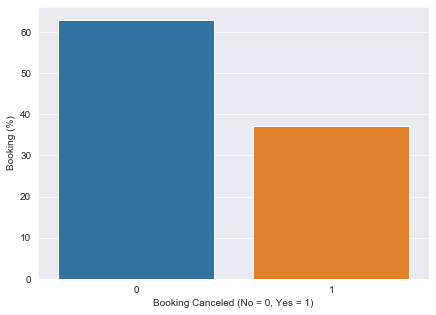

In [41]:
plot(x,y, x_label='Booking Canceled (No = 0, Yes = 1)', y_label='Booking (%)')


Bookings got canceled 37% of the time. 
While booking guest did check-in (did not cancel the booking ) almost 63% of the time.
For further analysis, we will select only those bookings which did not get canceled



In [42]:
dc_not_canceled = dc[dc['is_canceled'] == 0]

In [43]:
dc_not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 2. What is the booking ratio between Resort Hotel and City Hotel?
Let’s answer another question, how many bookings were made for each type of hotel.
We can now reuse the functions that we created earlier. 
All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) 
to plot function.




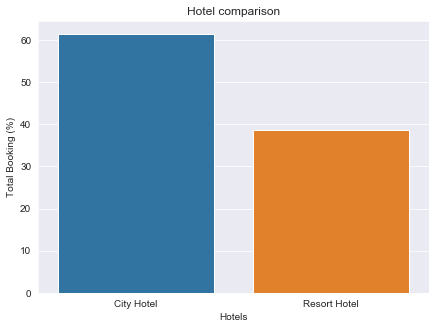

In [44]:
x,y = get_count(dc_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

### 3. What is the percentage of booking for each year?

In [ ]:
x,y = get_count(dc_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

More than double bookings were made in 2016, compared to the previous year. 
But the bookings decreased by almost 15% the following year.
Let’s separate it by the hotel and then plot the diagram. We will change our code to display the countplot.

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=dc_not_canceled);

### 4. Which is the busiest month for hotels?

To answer this question, we will select the arrival_date_month feature and get its value count. 
Now the resulting data will not be sorted according to month order so, we have to sort it. 
We will make the new list with the names of months in order to sort our data according to this list.
We will display the Lineplot to display the trend.

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = dc_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


                             Line plot to show the monthly hotel booking trend
   As we can see most bookings were made from July to August. 
   And the least bookings were made at the start and end of the year.

### Let’s separate the data for each hotel type and then see the trend.

In [ ]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = dc_not_canceled.loc[dc.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = dc_not_canceled.loc[dc.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

             Line plot to show the monthly hotel booking trend (separate line for each hotel type)
We can see the trend is kind of similar with a small difference. 
Resort has more bookings at the start and end of the year, and lower booking in June and September.

### 5. From which country most guests come?
To see the country wise comparison plot the country column. 
In the country column, we have codes for each country like PRT for Portugal.

To get the country names we will use pycountry. Pycountry is a very useful python package.
We will use this package to get country names from country codes

In [ ]:
import pycountry as pc

x,y = get_count(dc_not_canceled['country'], limit=10)

##For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

                             Country-wise booking percentage

Portugal, UK and France, Spain and Germany are the top countries from which most guests come; 
more than 80% come from these 5 countries.

### 6. How Long People Stay in the hotel?

In [ ]:
total_nights = dc_not_canceled['stays_in_weekend_nights']+ dc_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

                   Number of Nights People stay
 Most people stay for one, two, or three; More than 60% of guests come under these three options.

Let’s see the stay duration trend for each hotel type.

In [ ]:
dc_not_canceled.loc[:,'total_nights'] = dc_not_canceled['stays_in_weekend_nights']+ dc_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=dc_not_canceled,
              order = dc_not_canceled.total_nights.value_counts().loc[:10].index, ax=ax);

              Number of Nights People stay (For each hotel type)
For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
For City hotel, most popular stay duration is one, two, seven(week), and three respectively

### 7. Which was the most booked accommodation type (Single, Couple, Family)?
[Back To Table of Contents](#tableofcontents)

Which was the most booked accommodation type (Single, Couple, Family)?
We will divide people staying in the hotel into 3 categories. Single: 1 Adult only Couple: 2 Adults: We can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple :P Family or Friends: More than 2 people, including adults, children, and babies. (or alternatively, we can call it a group)

In [ ]:
#Select single, couple, multiple adults and family
single   = dc_not_canceled[(dc_not_canceled.adults==1) & (dc_not_canceled.children==0) & (dc_not_canceled.babies==0)]
couple   = dc_not_canceled[(dc_not_canceled.adults==2) & (dc_not_canceled.children==0) & (dc_not_canceled.babies==0)]
family   = dc_not_canceled[dc_not_canceled.adults + dc_not_canceled.children + dc_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/dc_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

                         Accommodation Type (Single, Couple, Family)
 Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly


<a id="con"></a>
## Conclusion:

 We used the dataset that contains data about hotel bookings.
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions:

How Many Booking Were Cancelled?

What is the booking ratio between Resort Hotel and City Hotel?

What is the percentage of booking for each year?

Which is the busiest month for hotels?

From which country most guests come?

How Long People Stay in the hotel?

Which was the most booked accommodation type (Single, Couple, Family)?

   We learned that almost 35% of bookings were canceled.

More than 60% of the population booked the City hotel.

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.

Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

Portugal, the UK, France, Spain and Germany are the top countries where most guests come from; more than 80% come from these 5 countries.

Most people stay for one, two, or three days.

For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.

For City hotel, most popular stay duration is one, two, seven(week), and three respectively.

Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly.


[Back To Table of Contents](#tableofcontents)